In [1]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

/Users/mohammad/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
with open(os.path.join('data', 'structures_df2_calc_with_bands_be.json')) as fhandle:
        df2 = json.load(fhandle)
with open(os.path.join('data', 'structures_rvv10_calc_with_bands_be.json')) as fhandle:
        rvv10 = json.load(fhandle)
with open(os.path.join('data', 'structures_revpbe_calc_with_bands_be.json')) as fhandle:
        revpbe = json.load(fhandle)

In [3]:
uiids = []
cells = []
volumes = []
relevant_dimension_of_highest_dimensionality_substructures = []
binding_energy_per_substructures = []
binding_energies = []
labels = []
number_of_atoms_in_bulks = []
number_of_highest_dimensionality_substructures_in_bulks = []
sub_structure_spgs = []
sub_structure_dims = []
energy_bulks = []
sub_structure_formulas = []
for key in df2.keys():
    try:
        relevant_dimension_of_highest_dimensionality_substructures.append(df2[key]['binding_energy']['relevant_dimension_of_highest_dimensionality_substructure'])
        uiids.append(key)
        cells.append(df2[key]['cell'])
        volumes.append(df2[key]['volume'])
        binding_energy_per_substructures.append(df2[key]['binding_energy']['binding_energy_per_substructure'])
        tmp = ( -1000. *
                    df2[key]['binding_energy']['binding_energy_per_substructure']/
                    df2[key]['binding_energy']['relevant_dimension_of_highest_dimensionality_substructure'])
        binding_energies.append(tmp)
        
        if tmp <= 30:
            labels.append('EE')
        elif 30 < tmp <= 130:
            labels.append('PE')
        else:
            labels.append('HBE')
                
        number_of_atoms_in_bulks.append(df2[key]['binding_energy']['number_of_atoms_in_bulk'])
        number_of_highest_dimensionality_substructures_in_bulks.append(df2[key]['binding_energy']['number_of_highest_dimensionality_substructures_in_bulk'])
        sub_structure_spgs.append(df2[key]['binding_energy']['sub_structure_spg'])
        sub_structure_dims.append(df2[key]['binding_energy']['sub_structure_dim'])
        energy_bulks.append(df2[key]['binding_energy']['energy_bulk'])
        sub_structure_formulas.append(df2[key]['binding_energy']['sub_structure_formulas'])
    except KeyError:
        continue

data_df2 = {
    'uiid' : uiids,
    'cell' : cells,
    'volume' : volumes,
    'relevant_dimension_of_highest_dimensionality_substructure' : relevant_dimension_of_highest_dimensionality_substructures,
    'binding_energy_per_substructure' : binding_energy_per_substructures,
    'binding_energy' : binding_energies,
    'label' : labels,
    'number_of_atoms_in_bulk' : number_of_atoms_in_bulks,
    'number_of_highest_dimensionality_substructures_in_bulk' : number_of_highest_dimensionality_substructures_in_bulks,
    'sub_structure_spg' : sub_structure_spgs,
    'sub_structure_dim' : sub_structure_dims,
    'energy_bulk' : energy_bulks,
    'sub_structure_formula' : sub_structure_formulas
}

dataframe_df2 = pd.DataFrame(data_df2)

In [4]:
dataframe_df2.head()

,uiid,cell,volume,relevant_dimension_of_highest_dimensionality_substructure,binding_energy_per_substructure,binding_energy,label,number_of_atoms_in_bulk,number_of_highest_dimensionality_substructures_in_bulk,sub_structure_spg,sub_structure_dim,energy_bulk,sub_structure_formula
0,dec2d070-d2ad-41f3-b742-786368ade33a,"[[2.1044124705, 1.2149831063, 34.279850741], [...",525.885600,15.340954,-0.165000,10.755509,EE,15,5,"[C2/m (12), C2/m (12), C2/m (12), C2/m (12), C...","[2, 2, 2, 2, 2]",-17198.871453,"[CdI2, CdI2, CdI2, CdI2, CdI2]"
1,51e630e8-d94f-421c-bd1e-3e2f298e740c,"[[3.35814166734363, 3.21879556184565e-14, -3.2...",52.188194,9.766268,-0.149888,15.347484,EE,3,1,[P-3m1 (164)],[2],-5361.474444,[Cl2Fe]
2,527e7b32-d211-4743-9631-120122819190,"[[2.14789490163679, -12.5878501270869, 0.0], [...",232.520056,18.471785,-0.454048,24.580650,EE,8,1,[P2_1/m (11)],[2],-26090.090963,[Er2Te6]
3,37bf14b1-6529-436c-a519-e1ad9b208784,"[[-2.0745739339, 2.0745739339, 7.4278571834], ...",127.873741,17.215428,-0.747937,43.445746,PE,3,1,[C2/m (12)],[2],-2866.173187,[Ba2Hg]
4,e7a9cec3-f11a-4d16-a8c5-ebd758bb6592,"[[4.6829418165, 0.0, 0.0], [0.0, 4.6829418165,...",166.823529,21.929944,-0.532853,24.297979,EE,6,1,[P4/nmm (129)],[2],-3217.539658,[Ba2H2I2]


In [5]:
    binding_energies_raw = {}
    for uuid_key in set(df2).union(rvv10):
        subdict = {}
        df2_binding_energy = df2.get(uuid_key, {}).get('binding_energy', {})
        if df2_binding_energy:
            subdict['df2'] = df2_binding_energy
        rvv10_binding_energy = rvv10.get(uuid_key, {}).get('binding_energy', {})
        if rvv10_binding_energy:
            subdict['rvv10'] = rvv10_binding_energy
        if subdict:
            binding_energies_raw[uuid_key] = subdict
    
    print("Found {} entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand".format(
        len(binding_energies_raw)))

    binding_energies = {}
    for key, val in binding_energies_raw.items():
        subdict = defaultdict(dict)
        subdict['sub_structure_formulas'] = []
        for method in ['rvv10', 'df2']:
            try:
                # meV / ang^2, with positive sign
                subdict[method] = ( -1000. *
                    val[method]['binding_energy_per_substructure']/
                    val[method]['relevant_dimension_of_highest_dimensionality_substructure'])
                subdict['sub_structure_formulas'] += val[method]['sub_structure_formulas'] # Might need to skip the non-2D ones
            except KeyError as exc:
                # Binding energy not computed with this method
                if str(exc) != "'{}'".format(method):
                    print(str(exc), method)
                    raise
        subdict['sub_structure_formulas'] = sorted(set(subdict['sub_structure_formulas']))
        binding_energies[key] = dict(subdict.items())
    BN_structures = {k: v for k, v in binding_energies.items() if 'BN' in v['sub_structure_formulas']}
    print("Structures containing BN:")
    print(json.dumps(BN_structures, indent=2))

Found 2663 entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand
Structures containing BN:
{
  "967b8f61-56d9-4082-8e85-cb834f47d8ac": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 25.157073954185357,
    "df2": 20.298162003656397
  },
  "f7e2ff32-27ed-4c89-9c3c-4acbaffbb897": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 25.073826446277092,
    "df2": 20.06262819882249
  },
  "8f2e38e9-01d5-4208-adaf-daa461ac8139": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 24.43280244214127,
    "df2": 19.38081606716093
  }
}


In [6]:
len (binding_energies)

2663

In [7]:
len (dataframe_df2['binding_energy'])

2492

In [8]:
dataframe_df2[dataframe_df2['uiid'] == 'dec2d070-d2ad-41f3-b742-786368ade33a']

,uiid,cell,volume,relevant_dimension_of_highest_dimensionality_substructure,binding_energy_per_substructure,binding_energy,label,number_of_atoms_in_bulk,number_of_highest_dimensionality_substructures_in_bulk,sub_structure_spg,sub_structure_dim,energy_bulk,sub_structure_formula
0,dec2d070-d2ad-41f3-b742-786368ade33a,"[[2.1044124705, 1.2149831063, 34.279850741], [...",525.8856,15.340954,-0.165,10.755509,EE,15,5,"[C2/m (12), C2/m (12), C2/m (12), C2/m (12), C...","[2, 2, 2, 2, 2]",-17198.871453,"[CdI2, CdI2, CdI2, CdI2, CdI2]"


In [102]:
binding_energies['dec2d070-d2ad-41f3-b742-786368ade33a']

{'sub_structure_formulas': ['CdI2'],
 'rvv10': 17.243582707583833,
 'df2': 10.755508771455325}

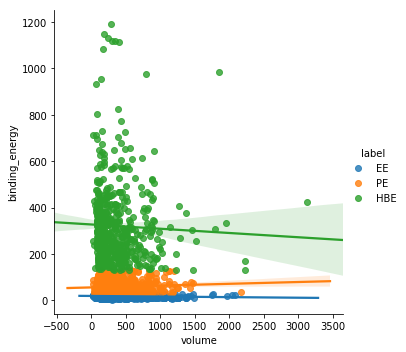

In [110]:
sns.lmplot(x = 'volume', y = 'binding_energy', data = dataframe_df2[dataframe_df2['binding_energy'] < 2000] , hue = 'label')

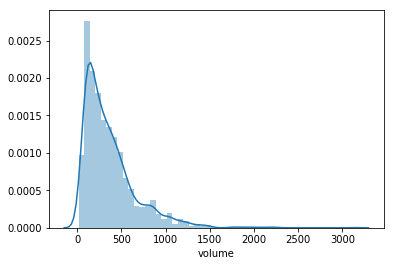

In [115]:
sns.distplot(dataframe_df2[dataframe_df2['binding_energy'] < 2000]['volume'] )

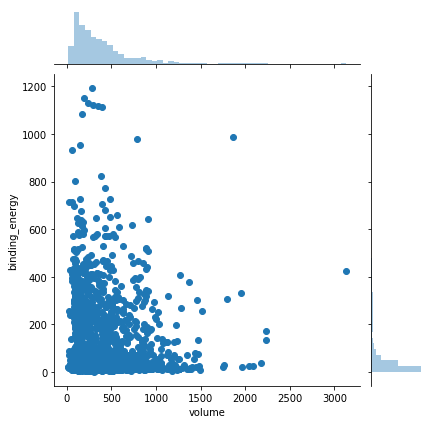

In [138]:
sns.jointplot(x = 'volume', y = 'binding_energy', data = dataframe_df2[dataframe_df2['binding_energy'] < 2000], kind= 'scatter')

<AxesSubplot:xlabel='label', ylabel='count'>

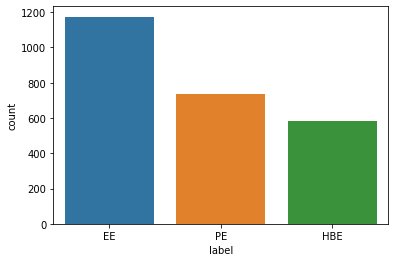

In [10]:
sns.countplot(x='label', data=dataframe_df2)

In [12]:
#sns.stripplot(x = 'volume', y = 'relevant_dimension_of_highest_dimensionality_substructure', data=dataframe_df2, hue='label')